# FOSM - a brief overview (with equations!)

## FOSM = "First Order, Second Moment", which is the mathematical description of what is being described

## FOSM = "linear uncertainty analysis", page 460 in Anderson et al. (2015), PEST parlance

<img src="bayes.png" style="float: left; width: 25%; margin-right: 1%; margin-bottom: 0.5em;">
<img src="jacobi.jpg" style="float: left; width: 25%; margin-right: 1%; margin-bottom: 0.5em;">
<img src="gauss.jpg" style="float: left; width: 22%; margin-right: 1%; margin-bottom: 0.5em;">
<img src="schur.jpg" style="float: left; width: 22%; margin-right: 1%; margin-bottom: 0.5em;">
<p style="clear: both;">

## $\underbrace{P(\boldsymbol{\theta}|\textbf{d})}_{\substack{\text{what we} \\ \text{know now}}} \propto \underbrace{\mathcal{L}(\boldsymbol{\theta} | \textbf{d})}_{\substack{\text{what we} \\ \text{learned}}} \underbrace{P(\boldsymbol{\theta})}_{\substack{\text{what we} \\ \text{knew}}} $






## This in a nutshell is the famous Bayes Rule.

### We can also think of this graphically, as taken from Anderson et al. (2015) in slightly different notation but the same equation and concept:

<img src="AW&H2015.png" style="float: right">

<img src="Fig10.3_Bayes_figure.png" style="float: center">

## The problem is for real-world problems, the likelihood function  $\mathcal{L}(\theta | \textbf{D})$ is high-dimensional and non-parameteric, requiring non-linear (typically Monte Carlo) integration for rigorous Bayes

## But, we can make some assumptions and greatly reduce computational burden. This is why we often suggest using these linear methods first before burning the silicon on the non-linear ones like Monte Carlo.  

## How do we reduced the computational burden?  By using these shortcuts:

## 0.) an approximate linear relation between pars and obs  
<img src="jacobi.jpg",width=200,height=200>

##     <center> $\mathbf{J} \approx \text{constant}$, $\frac{\partial\text{obs}}{\partial\text{par}} \approx \text{constant}$</center>


## 1.) The parameter and forecast posterior distribution is approximately Gaussian
<img src="gauss.jpg",width=200,height=200>
##  <center>  $ P(\boldsymbol{\theta}|\mathbf{d}) \approx \mathcal{N}(\overline{\boldsymbol{\mu}}_{\boldsymbol{\theta}},\overline{\boldsymbol{\Sigma}}_{\boldsymbol{\theta}})$ </center>

## Armed with these two assumptions, from Bayes equations, one can derive the Schur complement for conditional uncertainty propogation:
<img src="schur.jpg",width=200,height=200>


## <center> $\underbrace{\overline{\boldsymbol{\Sigma}}_{\boldsymbol{\theta}}}_{\substack{\text{what we} \\ \text{know now}}} = \underbrace{\boldsymbol{\Sigma}_{\boldsymbol{\theta}}}_{\substack{\text{what we} \\ \text{knew}}} - \underbrace{\boldsymbol{\Sigma}_{\boldsymbol{\theta}}\bf{J}^T\left[\bf{J}\boldsymbol{\Sigma}_{\boldsymbol{\theta}}\bf{J}^T + \boldsymbol{\Sigma}_{\boldsymbol{\epsilon}}\right]^{-1}\bf{J}\boldsymbol{\Sigma}_{\boldsymbol{\theta}}}_{\text{what we learned}}$ </center>

## some remarks:
## 0.) no parameter values or observation values
## 1.) "us + data" = $\overline{\Sigma}_{\theta}$; "us" = $\Sigma_{\theta}$
## 2.) the '-' on the RHS shows that we are (hopefully) collapsing the probability manifold in parameter space by "learning" from the data. Or put another way, we are subtracting from the uncertainty we started with (we started with the Prior uncertainty)
## 3.) uncertainty in our measurements of the world is encapsulated in $\Sigma_{\epsilon}$. If the "observations" are highly uncertain, then parameter "learning" decreases because $\Sigma_{\epsilon}$ is in the denominator. Put another way, if our measured data are made (assumed) to be accurate and precise, then uncertainty associated with the parameters that are constrained by these measured data is reduced - we "learn" more. 
## 4.) what quantities are needed? $\bf{J}$, $\boldsymbol{\Sigma}_{\theta}$, and $\boldsymbol{\Sigma}_{\epsilon}$
## 5.) the diagonal of $\Sigma_{\theta}$ and $\overline{\Sigma}_{\theta}$ are the Prior and Posterior uncertainty (variance) of each adjustable parameter

# But what about forecasts? We can use the same assumptions:
<img src="jacobi.jpg" style="float: left; width: 25%; margin-right: 1%; margin-bottom: 0.5em;">
<img src="gauss.jpg" style="float: left; width: 22%; margin-right: 1%; margin-bottom: 0.5em;">
<p style="clear: both;">

prior forecast uncertainty (variance): $\sigma^2_{s} = \mathbf{y}^T\boldsymbol{\Sigma}_{\boldsymbol{\theta}}\mathbf{y}$
posterior forecast uncertainty (variance): $\overline{\sigma}^2_{s} = \mathbf{y}^T\overline{\boldsymbol{\Sigma}}_{\boldsymbol{\theta}}\mathbf{y}$
some remarks:

- no parameter values or forecast values
- what's needed? $\bf{y}$, which is the *sensitivity of a given forecast* to each adjustable parameter. Each forecast will have its own $\bf{y}$
-   How do I get $\bf{y}$? the easiest way is to include your forecast(s) as an observation in the control file - then we get the $\bf{y}$'s for free during the parameter estimation process.

## Mechanics of calculating FOSM parameter and forecast uncertainty estimates

### in the PEST world:
<img src="workflow.png",width=1000,height=200>

## in PEST++
<img src="workflow++.png",width=1000,height=200>

# Hands on:  Demystifying matrices and vectors used in FOSM

Pages 461-465 of Anderson et al. use the PREDUNC equation of PEST to discuss an applied view of FOSM, what goes into it, and what it means in practice.  Here we will look more closely at these.  The objective is to get a better feel for what is going on under the hood in linear uncertainty analyses. 

In [1]:
%matplotlib inline
import os
import sys
sys.path.append("..")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyemu



In [2]:
import freyberg_setup as fs
pst_name = fs.PST_NAME_ZN
working_dir = fs.WORKING_DIR_ZN
fs.setup_pest_zn()


changing model workspace...
   freyberg_zn
FloPy is using the following  executable to run the model: /Users/mnfienen/Documents/GIT/GW1876/activities/intro_to_FOSM/freyberg_zn/mfnwt

                                  MODFLOW-NWT-SWR1 
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUNDWATER-FLOW MODEL
                             WITH NEWTON FORMULATION
                             Version 1.1.4 4/01/2018                         
                    BASED ON MODFLOW-2005 Version 1.12.0 02/03/2017                       

                    SWR1 Version 1.04.0 09/15/2016                       

 Using NAME file: freyberg.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2018/10/21 22:10:54

 Solving:  Stress period:     1    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:     2    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:     3    Time step:     1    Groundwater-Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2018/10/21 2

/Users/mnfienen/Documents/GIT/pyemu/pyemu/utils/gw_utils.py:1607: PyemuWarning: Flow out (flout) of grouped segments will be aggregated... 
  warnings.warn("Flow out (flout) of grouped segments will be aggregated... ", PyemuWarning)


writing 'sfr_obs.config' to sfr_obs.config
                                    obsnme     obsval  weight    obgnme
c001fr05c04_19791231  c001fr05c04_19791231  29.135645     0.0  forehead
c001fr16c17_19791231  c001fr16c17_19791231  21.775225     0.0  forehead
noptmax: 0
noptmax: 8


# Run pestpp and look at the FOSM files that are written

In [3]:
pyemu.os_utils.run("pestpp {0}".format(pst_name),cwd=working_dir)

### Let's look at the parameter uncertainty summary written by pestpp:

In [4]:
df = pd.read_csv(os.path.join(working_dir,pst_name.replace(".pst",".par.usum.csv")),index_col=0)
df


,prior_mean,prior_stdev,prior_lower_bound,prior_upper_bound,post_mean,post_stdev,post_lower_bound,post_upper_bound
name,,,,,,,,
HK_Z01,0.69897,0.500000,-0.301030,1.698970,1.698970,0.499996,0.698977,2.698960
HK_Z02,0.69897,0.500000,-0.301030,1.698970,0.733360,0.408549,-0.083737,1.550460
HK_Z03,0.69897,0.500000,-0.301030,1.698970,0.738441,0.153762,0.430917,1.045960
HK_Z04,0.69897,0.500000,-0.301030,1.698970,0.711772,0.250551,0.210671,1.212870
HK_Z05,0.69897,0.500000,-0.301030,1.698970,0.532583,0.263130,0.006323,1.058840
HK_Z06,0.69897,0.500000,-0.301030,1.698970,0.863925,0.198433,0.467058,1.260790
POROSITY,-2.00000,0.150515,-2.301030,-1.698970,-2.000000,0.150515,-2.301030,-1.698970
RCH_0,0.00000,0.150515,-0.301030,0.301030,0.011718,0.023338,-0.034957,0.058394
RCH_1,0.00000,0.269795,-0.539591,0.539591,0.000000,0.269795,-0.539591,0.539591


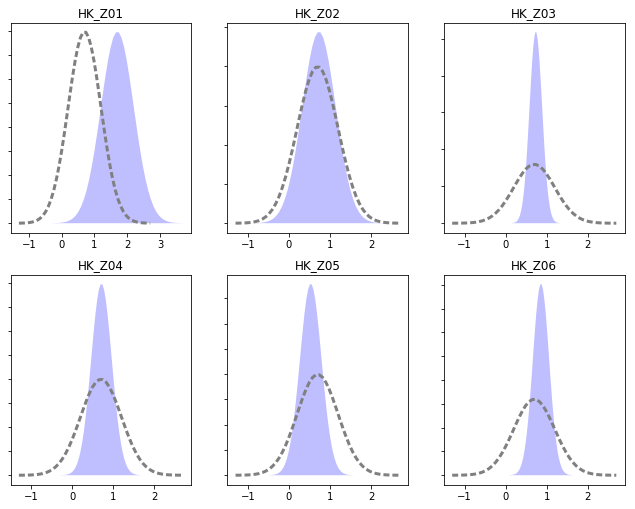

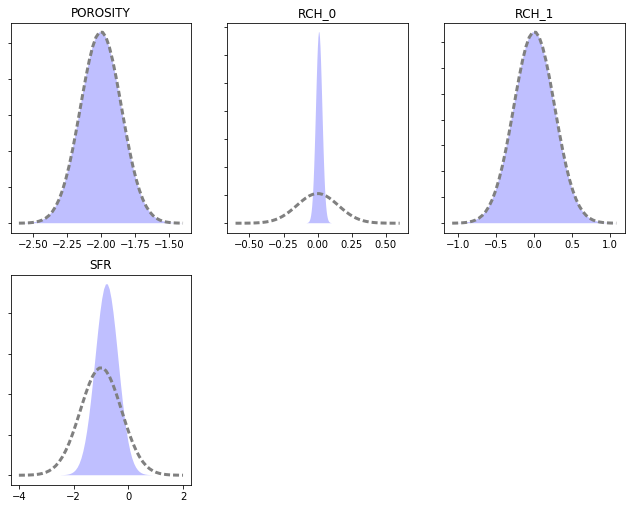

In [5]:
axes = pyemu.plot_utils.plot_summary_distributions(df,subplots=True)

### There is a similar file for forecasts:

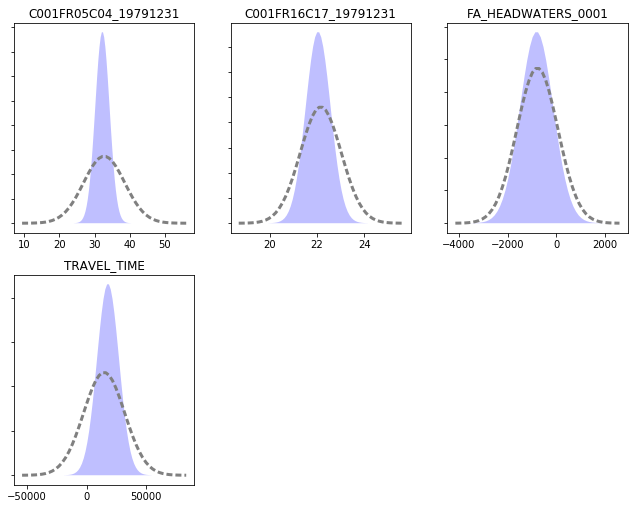

In [6]:
axes = pyemu.plot_utils.plot_summary_distributions(os.path.join(working_dir,pst_name.replace(".pst",".pred.usum.csv")),subplots=True)

### So that's cool!  Questions:
### - where do the prior parameter distro's come from?
### - where do the prior forecast distro's come from?
### - why are are the posterior distro's differenent than the priors?

## but pyemu does the same calculations, but also allows you to do other, more exciting things...

# FOSM with pyEMU

### The ``Schur`` object is one of the primary object for FOSM in pyEMU and the only one we will talk about in this class

In [7]:
sc = pyemu.Schur(jco=os.path.join(working_dir,pst_name.replace(".pst",".jcb")),verbose=True)

2018-10-21 22:13:27.005112 starting: pre-loading base components
2018-10-21 22:13:27.005290 starting: loading jco: freyberg_zn/freyberg_zn.jcb
2018-10-21 22:13:27.009114 finished: loading jco: freyberg_zn/freyberg_zn.jcb took: 0:00:00.003824
2018-10-21 22:13:27.009379 starting: loading pst: freyberg_zn/freyberg_zn.pst
2018-10-21 22:13:27.069481 finished: loading pst: freyberg_zn/freyberg_zn.pst took: 0:00:00.060102
2018-10-21 22:13:27.069591 starting: loading parcov
2018-10-21 22:13:27.116574 finished: loading parcov took: 0:00:00.046983
2018-10-21 22:13:27.116681 starting: loading obscov
2018-10-21 22:13:27.223171 finished: loading obscov took: 0:00:00.106490
2018-10-21 22:13:27.223332 starting: loading forecasts
2018-10-21 22:13:27.226775 finished: loading forecasts took: 0:00:00.003443
2018-10-21 22:13:27.227055 forecast names: travel_time,fa_headwaters_0001,c001fr16c17_19791231,c001fr05c04_19791231
2018-10-21 22:13:27.227100 finished: pre-loading base components took: 0:00:00.22198

### Now that seemed too easy, right?  Well, underhood the ``Schur`` object found the control file ("freyberg_zn.pst") and used it to build the prior parameter covariance matrix, $\boldsymbol{\Sigma}_{\theta}$, from the parameter bounds and the observation noise covariance matrix ($\boldsymbol{\Sigma}_{\epsilon}$) from the observation weights.  These are the ``Schur.parcov`` and ``Schur.obscov`` attributes.  

### The ``Schur`` object also found the "++forecasts()" optional pestpp argument in the control, found the associated rows in the Jacobian matrix file and extracted those rows to serve as forecast sensitivity vectors:

In [8]:
sc.pst.pestpp_options

{'forecasts': 'travel_time,fa_headwaters_0001,c001fr16c17_19791231,c001fr05c04_19791231',
 'lambda_scale_fac': '1.0',
 'upgrade_augment': 'false',
 'lambdas': '0.1,1.0,10.0'}

### Recall that a Jacobian matrix looks at the changes in observations as a parameter is changed.  Therefore the Jacobian matrix has parameters in the columns and observations in the rows.  The bulk of the matrix is made up of the difference in  observations between a base run and a run where the parameter at the column head was perturbed (typically 1% from the base run value - controlled by the "parameter groups" info).  Now we'll plot out the Jacobian matrix from the fryberg_zones activity:

In [9]:
sc.jco.to_dataframe().loc[sc.pst.nnz_obs_names,:]

,hk_z01,hk_z02,hk_z03,hk_z04,hk_z05,hk_z06,porosity,rch_0,rch_1,sfr
c001cr03c10_19700102,5.822760e-03,-1.289954,-7.110719,-0.870023,-0.248438,-0.168210,-5.546962e-13,10.777388,0.000000e+00,-0.361800
c001cr03c16_19700102,1.141505e-04,-0.290458,-0.651930,-0.080159,-0.021355,-0.013341,-4.485724e-13,1.951801,0.000000e+00,-0.526439
c001cr04c09_19700102,4.619539e-03,-1.823439,-7.768148,-1.027773,-0.297281,-0.203226,-3.793232e-13,12.269692,0.000000e+00,-0.332825
c001cr10c02_19700102,-2.306274e-02,-6.882198,-10.195894,-1.397601,-0.901027,-0.744136,-6.223941e-13,21.378973,0.000000e+00,-0.228483
c001cr14c11_19700102,-2.195619e-04,-0.020964,-0.656104,-2.063140,-0.868949,-0.171745,-7.483176e-13,5.860178,0.000000e+00,-0.376397
c001cr16c17_19700102,2.720504e-13,-0.022316,-0.071150,-1.356869,-0.112684,-0.043858,-4.386178e-13,2.647452,0.000000e+00,-0.459924
c001cr22c11_19700102,-1.097809e-03,0.129970,-0.019767,-1.612093,-3.635259,-1.112165,-7.731505e-13,8.487372,0.000000e+00,-0.447743
c001cr23c16_19700102,1.054114e-04,0.055101,0.093864,-0.668126,-0.467489,-0.142000,-3.131295e-13,2.041572,0.000000e+00,-0.594154
c001cr25c05_19700102,-4.505389e-03,-0.991013,-5.106964,-3.091884,-3.222369,-2.660306,-5.852750e-13,17.613086,0.000000e+00,-0.285537
c001cr27c07_19700102,-3.073867e-03,-0.369857,-1.130353,-3.238197,-4.051942,-3.354824,2.390709e-14,15.158505,0.000000e+00,-0.325927


### This reports changes in observations to a change in a parameter.  We can report how  forecasts of interests change as the parameter is perturbed.  Note pyemu extracted the forecast rows from the Jacobian on instantiation:

In [10]:
sc.forecasts.to_dataframe()

,travel_time,fa_headwaters_0001,c001fr16c17_19791231,c001fr05c04_19791231
hk_z01,10.360230,-2.263729e+00,3.678171e-13,-1.779325e-02
hk_z02,3672.362043,2.618175e+01,-2.346713e-02,-6.006874e+00
hk_z03,-4169.060871,1.012250e+02,-8.448690e-02,-8.733295e+00
hk_z04,275.442186,4.159800e+02,-1.342875e+00,-1.149301e+00
hk_z05,-29308.015681,1.748422e+02,-1.100096e-01,-4.988137e-01
hk_z06,-10999.123275,6.949884e+01,-4.206119e-02,-3.827166e-01
porosity,41537.386281,1.447755e-11,-5.525947e-13,-5.283514e-13
rch_0,-1915.417992,-2.929435e+03,1.104934e+00,1.398978e+01
rch_1,-1486.245055,-2.507808e+03,1.509677e+00,3.833429e+00
sfr,2948.233864,5.705916e+01,-4.199140e-01,-2.559118e-01


### Each of these columns in a $\bf{y}$ vector used in the FOSM calculations...that's it!


### But the forecasts also have uncertainty because we have inherent uncertainty in the parameters.  Here's what we have defined for parameter uncertainty - the Prior.  It was constructed on-the-fly from the parameter bounds in the control file: 

In [11]:
sc.parcov.to_dataframe()

,hk_z01,hk_z02,hk_z03,hk_z04,hk_z05,hk_z06,porosity,rch_0,rch_1,sfr
hk_z01,0.25,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.00000,0.0000
hk_z02,0.00,0.25,0.00,0.00,0.00,0.00,0.000000,0.000000,0.00000,0.0000
hk_z03,0.00,0.00,0.25,0.00,0.00,0.00,0.000000,0.000000,0.00000,0.0000
hk_z04,0.00,0.00,0.00,0.25,0.00,0.00,0.000000,0.000000,0.00000,0.0000
hk_z05,0.00,0.00,0.00,0.00,0.25,0.00,0.000000,0.000000,0.00000,0.0000
hk_z06,0.00,0.00,0.00,0.00,0.00,0.25,0.000000,0.000000,0.00000,0.0000
porosity,0.00,0.00,0.00,0.00,0.00,0.00,0.022655,0.000000,0.00000,0.0000
rch_0,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.022655,0.00000,0.0000
rch_1,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.07279,0.0000
sfr,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.00000,0.5625


### Page 463-464 in Anderson et al. (2015) spends some time on what is shown above.  For our purposes, a diagonal Prior -  numbers only along the diagaonal - shows that we expect the uncertainty for each parameter to only results from itself - there is no covariance with other parameters. The numbers themselves reflect "the innate parameter variability", and is input into the maths as a standard deviation around the parameter value.  This is called the "C(p) matrix of innate parameter variability" in the PEST parlance.

## IMPORTANT POINT:  Again, how did PEST++ and pyEMU get these standard deviations shown in the diagonal?  From the *parameter bounds* that were specified for each parameter in the PEST control file.

### On page 462-463 in Anderson et al. they also point out that a forecast uncertainty has to take into account the noise/uncertainty in the observations.   Similar to the parameter Prior - the $\Sigma_{\theta}$ matrix -, it is a covariance matrix of measurement error associated with the observations.  This is the same as  $\Sigma_{\epsilon}$ that we discussed above. For our Fryberg problem, say each observation had a standard devation of 1 around the observed value.  The $C{\epsilon}$ matrix would look like:

In [12]:
sc.obscov.to_dataframe().loc[sc.pst.nnz_obs_names,sc.pst.nnz_obs_names]

,c001cr03c10_19700102,c001cr03c16_19700102,c001cr04c09_19700102,c001cr10c02_19700102,c001cr14c11_19700102,c001cr16c17_19700102,c001cr22c11_19700102,c001cr23c16_19700102,c001cr25c05_19700102,c001cr27c07_19700102,c001cr30c16_19700102,c001cr34c08_19700102,c001cr35c11_19700102,fo_seg_40_0000
c001cr03c10_19700102,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
c001cr03c16_19700102,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
c001cr04c09_19700102,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
c001cr10c02_19700102,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
c001cr14c11_19700102,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
c001cr16c17_19700102,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
c001cr22c11_19700102,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.0
c001cr23c16_19700102,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.0
c001cr25c05_19700102,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.0
c001cr27c07_19700102,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.0


### IMPORTANT POINT:  How did PEST++ and pyEMU get these standard deviations shown in the diagonal?  From the *weights* that were specified for each observation in the PEST control file.

### IMPORTANT POINT: You can use FOSM in the "pre-calibration" state to design an objective function (e.g. weights) to maximize forecast uncertainty reduction.

### IMPORTANT POINT: In PEST++, if a given observation has a larger-than-expected residual, the variance of said observation is reset to the variance implied by the residual.  That is, the diagonal elements of $\Sigma_{\epsilon}$ are reset according to the residuals

### Okay, enough emphasis.  Here's the point.  When we apply FOSM using these matrices above we can see how our uncertainty changes during calibration, first for parameters and then for forecasts:

2018-10-21 22:13:59.561138 starting: Schur's complement
2018-10-21 22:13:59.561870 starting: xtqx
2018-10-21 22:13:59.574395 finished: xtqx took: 0:00:00.012525
2018-10-21 22:13:59.577783 finished: Schur's complement took: 0:00:00.016645


,prior_var,post_var,percent_reduction
hk_z01,0.250000,0.249952,0.019010
hk_z02,0.250000,0.003203,98.718678
hk_z03,0.250000,0.000961,99.615683
hk_z04,0.250000,0.007697,96.921213
hk_z05,0.250000,0.007001,97.199731
hk_z06,0.250000,0.007581,96.967474
porosity,0.022655,0.022655,0.000000
rch_0,0.022655,0.000054,99.760367
rch_1,0.072790,0.072790,0.000000
sfr,0.562500,0.034943,93.787934


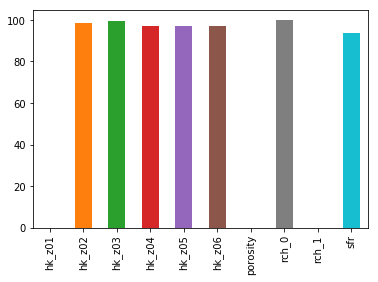

In [13]:
df = sc.get_parameter_summary()
df.percent_reduction.plot(kind="bar")
df

### Do these results make sense?  Why is ``rch_1`` unaffected by calibration?

###  Where did the "prior_var" and "post_var" columns come from?

In [14]:
sc.get_forecast_summary()

2018-10-21 22:14:12.213833 starting: propagating prior to predictions
2018-10-21 22:14:12.215812 finished: propagating prior to predictions took: 0:00:00.001979
2018-10-21 22:14:12.215944 starting: propagating posterior to predictions
2018-10-21 22:14:12.217516 finished: propagating posterior to predictions took: 0:00:00.001572


,prior_var,post_var,percent_reduction
travel_time,2.969416e+08,4.379589e+07,85.251012
fa_headwaters_0001,7.088697e+05,4.586936e+05,35.292256
c001fr16c17_19791231,7.489578e-01,1.795197e-01,76.030737
c001fr05c04_19791231,3.405771e+01,1.100768e+00,96.767933


### Do these results make sense?  Remember, these are not the "calibrated" forecast values, these are the prior (before calibration) and posterior (after calibration) forecast uncertainties...